**MOVIE REVIEW SENTIMENT ANALYSIS**

*A project by Keerthi Manoja Potluri*


# **Project Description**

## **Project Description**

The **Movie Review Sentiment Analysis** project involves developing a machine learning model to classify movie reviews as either positive or negative. This project combines various aspects of machine learning, natural language processing (NLP), and web development to provide an interactive user experience for sentiment classification.

### **Objectives**

- **Develop a Sentiment Analysis Model**: Train a machine learning model to analyze and classify movie reviews based on their sentiment.
- **Create a Web Interface**: Build a user-friendly web application using Streamlit to allow users to input movie reviews and receive sentiment predictions in real-time.
- **Visualize Data**: Implement data visualization techniques to provide insights into the dataset, such as word clouds for different sentiment categories.

### **Methodology**

1. **Data Collection**:
   - Utilized the IMDB movie review dataset for training the sentiment analysis model.

2. **Data Preprocessing**:
   - **Text Cleaning**: Removed duplicates and missing values from the dataset. Cleaned text data by removing stop words using NLTK.
   - **Vectorization**: Employed `TfidfVectorizer` to transform text data into numerical features suitable for machine learning algorithms.

3. **Model Training**:
   - Implemented a Logistic Regression model to classify the sentiment of movie reviews.
   - Split the dataset into training and testing sets to evaluate the model's performance.

4. **Evaluation**:
   - Assessed model performance using metrics like accuracy, precision, recall, and confusion matrices.

5. **Web Application**:
   - Developed a web interface using Streamlit to allow users to input movie reviews and get sentiment predictions.
   - Integrated the pre-trained model and vectorizer into the web application to ensure consistent processing and prediction.

6. **Deployment**:
   - Saved the trained model and `TfidfVectorizer` to disk using `pickle` for deployment.
   - Set up a local Streamlit server to host the web application, allowing users to interact with the sentiment analysis tool.

### **Technical Stack**

- **Programming Languages**: Python
- **Libraries**:
  - **Machine Learning**: `scikit-learn`, `pickle`
  - **Data Processing**: `pandas`, `nltk`
  - **Web Development**: `streamlit`
  - **Visualization**: `matplotlib`, `wordcloud`
- **Tools**: Google Colab for training and testing; Visual Studio Code for Streamlit application development

### **Key Features**

- **Interactive User Interface**: Users can input movie reviews and receive instant sentiment analysis results.
- **Real-time Prediction**: Utilizes the pre-trained model to provide sentiment predictions in real-time.
- **Data Visualization**: Includes features like word clouds to visualize frequently occurring words in positive and negative reviews.

### **Challenges and Solutions**

- **Handling Imbalanced Data**: Addressed the issue of imbalanced classes in the dataset by ensuring adequate preprocessing and model evaluation.
- **Text Processing**: Ensured correct text preprocessing and vectorization to match the training data format.

### **Future Enhancements**

- **Model Improvement**: Explore advanced models such as BERT or LSTM for potentially better performance.
- **Additional Features**: Implement sentiment analysis for multiple languages or extend the application to other types of reviews (e.g., product reviews).





# **Project Code**



**Importing**

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import pickle as pk
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Data Pre Processing**

In [34]:
#Loading the dataset
data = pd.read_csv('Movie_Review.csv')

In [51]:
#Display column names
print(data.columns)

Index(['text', 'sentiment'], dtype='object')


In [52]:
#Check the sentiment value count
print(data['sentiment'].value_counts())

sentiment
0    500
1    500
Name: count, dtype: int64


In [53]:
#Drop duplicates and missing values
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [55]:
# define the function and apply to column
def cln_rev(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

data['text'] = data['text'].apply(cln_rev)

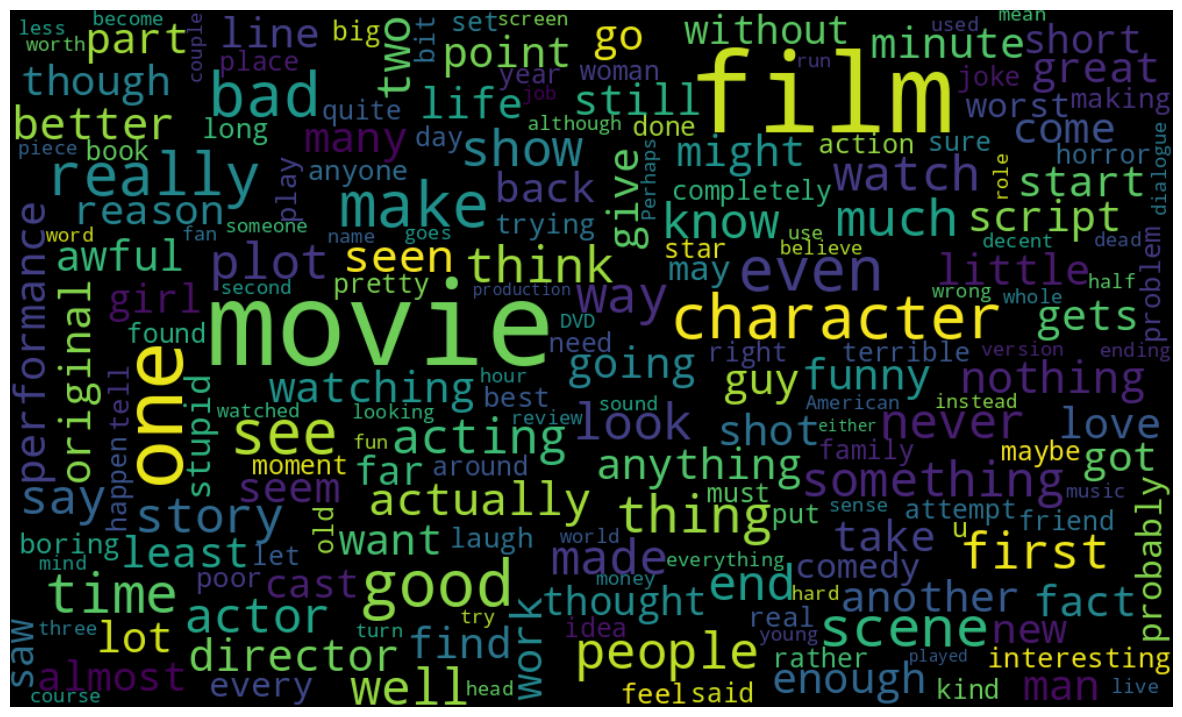

In [38]:
#Negative Wordcloud
reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'neg'].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

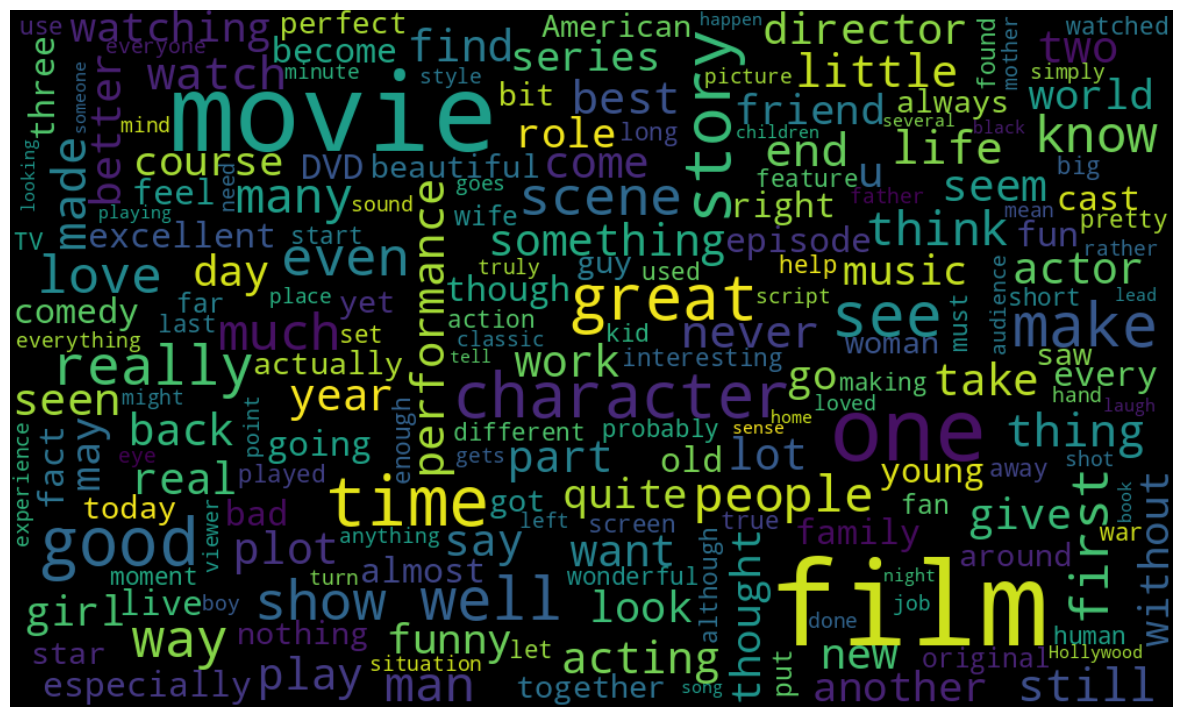

In [39]:
#positive worldcloud
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'pos'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [41]:
reviews = cv.fit_transform(data['text']).toarray()

In [42]:
data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])

In [43]:
data['sentiment'].value_counts()

sentiment
0    500
1    500
Name: count, dtype: int64

**Model Training**

In [44]:
model = LogisticRegression()

In [45]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [46]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [47]:
predict = model.predict(reviews_test)

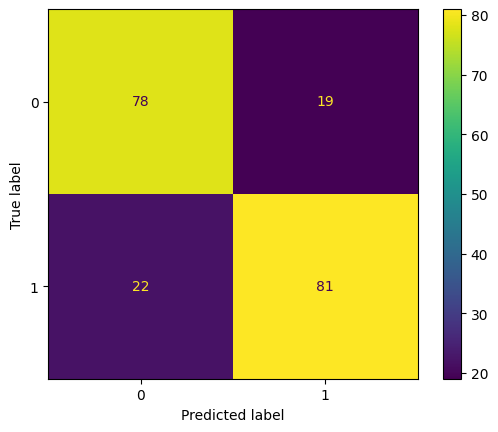

In [48]:
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [49]:
pk.dump(model,open('model.pkl','wb'))

In [50]:
pk.dump(cv,open('scaler.pkl','wb'))